In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
#from google.colab import files
#upload = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **MÔ TẢ DỮ LIỆU**

**ĐỌC DỮ LIỆU**

In [4]:
#df = pd.read_csv('Clean_Dataset.csv')
#df1 = pd.read_csv('business.csv')
#df2 = pd.read_csv('economy.csv')

In [5]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dulieu/Clean_Dataset.csv")
df1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dulieu/business.csv")
df2= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dulieu/economy.csv")

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [8]:
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


**LIÊN KẾT CÁC FILE**

In [9]:
df1['price'] = df1['price'].str.replace(',', '')
df1['price'] = df1['price'].astype(int)

df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].astype(int)

In [10]:
df1['stop'] = df1['stop'].str.replace('\n', '')
df1['stop'] = df1['stop'].str.replace('\t', '')
df1['stop'].str.strip()

df2['stop'] = df2['stop'].str.replace('\n', '')
df2['stop'] = df2['stop'].str.replace('\t', '')
df2['stop'].str.strip()

0         non-stop
1         non-stop
2         non-stop
3         non-stop
4         non-stop
            ...   
206769      1-stop
206770      1-stop
206771      1-stop
206772      1-stop
206773      1-stop
Name: stop, Length: 206774, dtype: object

In [11]:
df1['time_taken'] = df1['time_taken'].apply(lambda x: x.split("h")[0])
df1['time_taken'] = df1['time_taken'].astype(float)

df2['time_taken'] = df2['time_taken'].apply(lambda x: x.split("h")[0])
df2['time_taken'] = df2['time_taken'].astype(float)

In [12]:
df1['time_taken'] = df1['time_taken'].astype(int)
df2['time_taken'] = df2['time_taken'].astype(int)

**ĐỊNH DẠNG LẠI NGÀY THÁNG**

In [13]:
df1['date'] = pd.to_datetime(df1['date'], format='%d-%m-%Y')
df1.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken             int64
stop                  object
arr_time              object
to                    object
price                  int64
dtype: object

In [14]:
df2['date'] = pd.to_datetime(df2['date'], format='%d-%m-%Y')
df2.dtypes

date          datetime64[ns]
airline               object
ch_code               object
num_code               int64
dep_time              object
from                  object
time_taken             int64
stop                  object
arr_time              object
to                    object
price                  int64
dtype: object

**SỐ DÒNG, CỘT CỦA CÁC FILE**

In [15]:
print("Cleand Dataset Shape:", df.shape)
print("Business Dataset Shape:", df1.shape)
print("Economy Dataset Shape:", df2.shape)

Cleand Dataset Shape: (300153, 12)
Business Dataset Shape: (93487, 11)
Economy Dataset Shape: (206774, 11)


**CHIA CLASS**

In [16]:
df1['class'] = 'Business'
df2['class'] = 'Economy'

In [17]:
display(df2.head())

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,SpiceJet,SG,8709,18:55,Delhi,2,non-stop,21:05,Mumbai,5953,Economy
1,2022-02-11,SpiceJet,SG,8157,06:20,Delhi,2,non-stop,08:40,Mumbai,5953,Economy
2,2022-02-11,AirAsia,I5,764,04:25,Delhi,2,non-stop,06:35,Mumbai,5956,Economy
3,2022-02-11,Vistara,UK,995,10:20,Delhi,2,non-stop,12:35,Mumbai,5955,Economy
4,2022-02-11,Vistara,UK,963,08:50,Delhi,2,non-stop,11:10,Mumbai,5955,Economy


In [18]:
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,AI,868,18:00,Delhi,2,non-stop,20:00,Mumbai,25612,Business
1,2022-02-11,Air India,AI,624,19:00,Delhi,2,non-stop,21:15,Mumbai,25612,Business
2,2022-02-11,Air India,AI,531,20:00,Delhi,24,1-stop,20:45,Mumbai,42220,Business
3,2022-02-11,Air India,AI,839,21:25,Delhi,26,1-stop,23:55,Mumbai,44450,Business
4,2022-02-11,Air India,AI,544,17:15,Delhi,6,1-stop,23:55,Mumbai,46690,Business


In [19]:
display(df.head())

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**KẾT HỢP DỮ LIỆU BẢNG BUSINESS VÀ ECONOMY**

*thông tin bảng dữ liệu mới sau khi kết hợp*

In [20]:
new_df=pd.concat([df1, df2])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  int64         
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  int64         
 11  class       300261 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 29.8+ MB


In [21]:
new_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,Air India,AI,868,18:00,Delhi,2,non-stop,20:00,Mumbai,25612,Business
1,2022-02-11,Air India,AI,624,19:00,Delhi,2,non-stop,21:15,Mumbai,25612,Business
2,2022-02-11,Air India,AI,531,20:00,Delhi,24,1-stop,20:45,Mumbai,42220,Business
3,2022-02-11,Air India,AI,839,21:25,Delhi,26,1-stop,23:55,Mumbai,44450,Business
4,2022-02-11,Air India,AI,544,17:15,Delhi,6,1-stop,23:55,Mumbai,46690,Business


*đếm số lượng chuyến bay theo ngày*

In [22]:
new_df.date.value_counts()

2022-03-07    6633
2022-02-28    6603
2022-03-21    6594
2022-03-14    6586
2022-03-08    6577
2022-03-06    6543
2022-03-01    6541
2022-03-15    6536
2022-03-13    6536
2022-03-22    6535
2022-03-10    6527
2022-03-23    6526
2022-03-20    6513
2022-03-12    6505
2022-03-24    6503
2022-03-02    6502
2022-03-04    6495
2022-03-18    6491
2022-03-03    6483
2022-03-19    6480
2022-03-25    6473
2022-03-26    6440
2022-02-27    6420
2022-02-21    6418
2022-03-16    6412
2022-03-05    6405
2022-02-23    6404
2022-03-11    6398
2022-02-22    6385
2022-03-09    6361
2022-02-24    6353
2022-02-25    6342
2022-03-27    6314
2022-03-17    6296
2022-02-26    6279
2022-03-28    6160
2022-03-31    6157
2022-03-30    6078
2022-03-29    6072
2022-02-20    5823
2022-02-18    5768
2022-02-16    5740
2022-02-17    5703
2022-02-19    5669
2022-02-15    5395
2022-02-14    5079
2022-02-13    4250
2022-02-12    4031
2022-02-11    1927
Name: date, dtype: int64

*đếm số lượng chuyến bay theo kí hiệu*

In [23]:
new_df.ch_code.value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
S5        61
2T        41
Name: ch_code, dtype: int64

*đếm số lượng chuyến bay theo số hiệu*

In [24]:
new_df['num_code'].value_counts()

808     3313
706     3235
772     2860
774     2808
720     2650
        ... 
1058       1
6474       1
9974       1
405        1
8193       1
Name: num_code, Length: 1255, dtype: int64

*đếm theo số lượng chặng bay*

In [25]:
new_df.stop.value_counts()

1-stop                      243603
non-stop                     36044
2+-stop                      13288
1-stopVia IXU                 1839
1-stopVia IDR                 1398
1-stopVia Patna                674
1-stopVia Indore               381
1-stopVia PAT                  354
1-stopVia MYQ                  321
1-stopVia Bhubaneswar          301
1-stopVia KLH                  284
1-stopVia JGB                  193
1-stopVia JRG                  175
1-stopVia STV                  169
1-stopVia BBI                  158
1-stopVia Delhi                153
1-stopVia Hyderabad            143
1-stopVia IXE                  120
1-stopVia Ranchi               114
1-stopVia Raipur               102
1-stopVia Chennai               77
1-stopVia Guwahati              55
1-stopVia Mysore                45
1-stopVia Mangalore             39
1-stopVia Mumbai                31
1-stopVia Kolkata               28
1-stopVia VTZ                   27
1-stopVia Nagpur                25
1-stopVia RPR       

**THAO TÁC VỚI BẢNG CLEAN DATASET**

*đếm theo mã chuyến bay*

In [26]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

*thông tin bảng Clean Dataset*

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


*xoá cột unnamed*

In [28]:
df3=df.drop(['Unnamed: 0'],axis=1)
df3.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [29]:
df3['days_left'] = df3['days_left'].astype(int)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


*đếm theo thời gian bay *

In [31]:
df3.duration.value_counts().sort_values()

41.50       1
47.08       1
35.67       1
44.50       1
42.00       1
         ... 
2.83     2323
2.08     2755
2.75     2879
2.25     4036
2.17     4242
Name: duration, Length: 476, dtype: int64

In [32]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [33]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

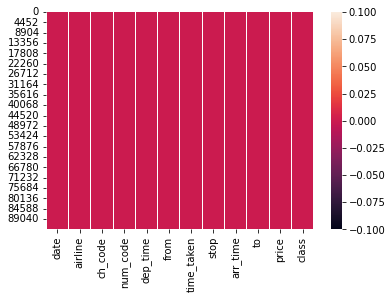

In [34]:
sns.heatmap(df1.isnull())

*đếm theo nơi khởi hành*

In [35]:
df3['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

*đếm theo nơi kết thúc*

In [36]:
df3['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [37]:
df3['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [38]:
new_df.corr().style.background_gradient()

,num_code,time_taken,price
num_code,1.000000,-0.133619,-0.212865
time_taken,-0.133619,1.000000,0.205324
price,-0.212865,0.205324,1.000000


## **YẾU TỐ SO VỚI GIÁ**

*Hạng vé vs Giá vé*

[Text(0.5, 1.0, 'Chuyến bay dựa trên hạng bay')]

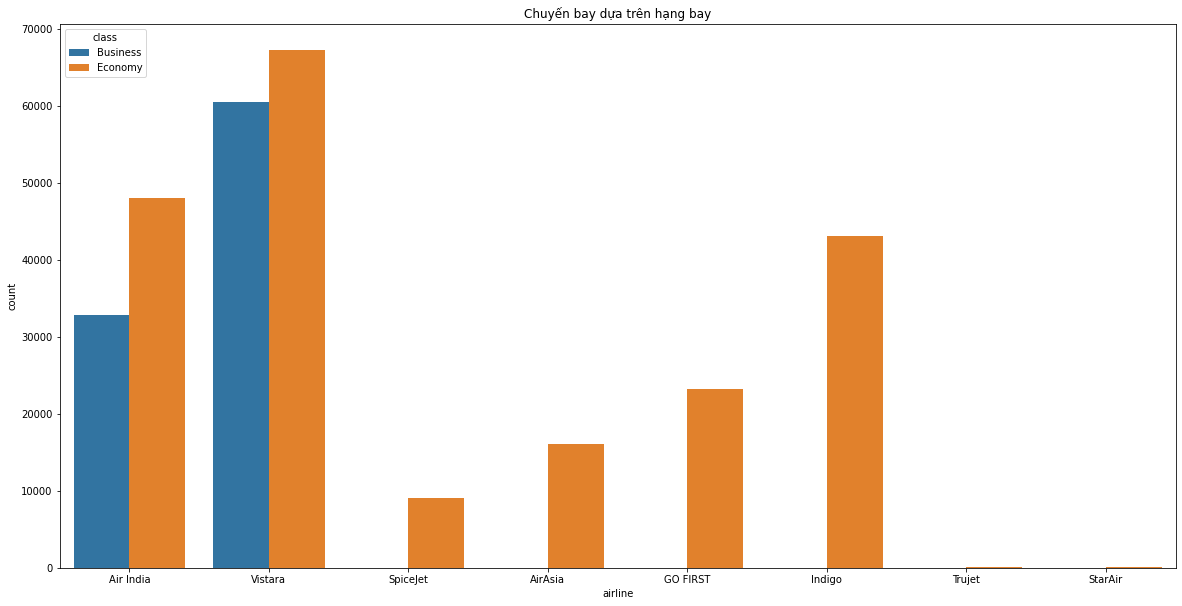

In [39]:
plt.figure(figsize=(20, 10))
sns.countplot(x='airline',hue='class' ,data=new_df).set(title='Chuyến bay dựa trên hạng bay')

=> Số lượng chuyến bay theo cả hạng Thương gia và hạng Phổ thông nhiều nhất là của hãng Vistara, đứng nhì là hãng Air India

[Text(0.5, 1.0, 'Price variation based on airline respect to class')]

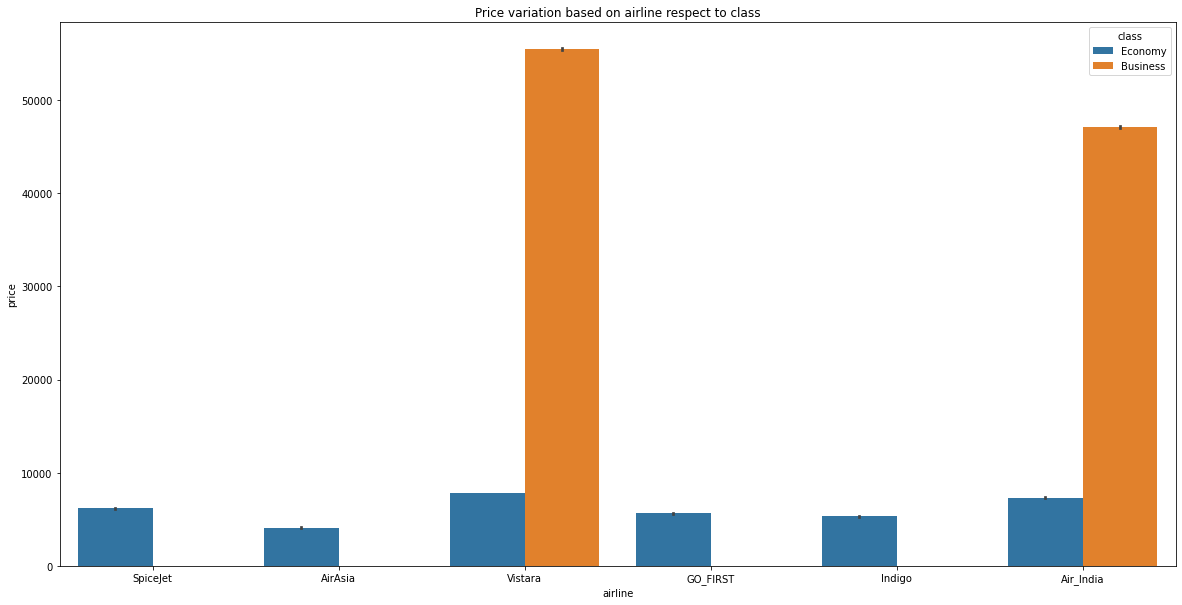

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline', y='price',hue='class' ,data=df3).set(title='Price variation based on airline respect to class')

- Ở đây chúng ta có thể thấy một số khác biệt lớn về hạng Phổ thông và hạng Thương gia nhưng điều này chỉ xảy ra ở hai hãng hàng không.

*Hãng bay vs Giá vé*

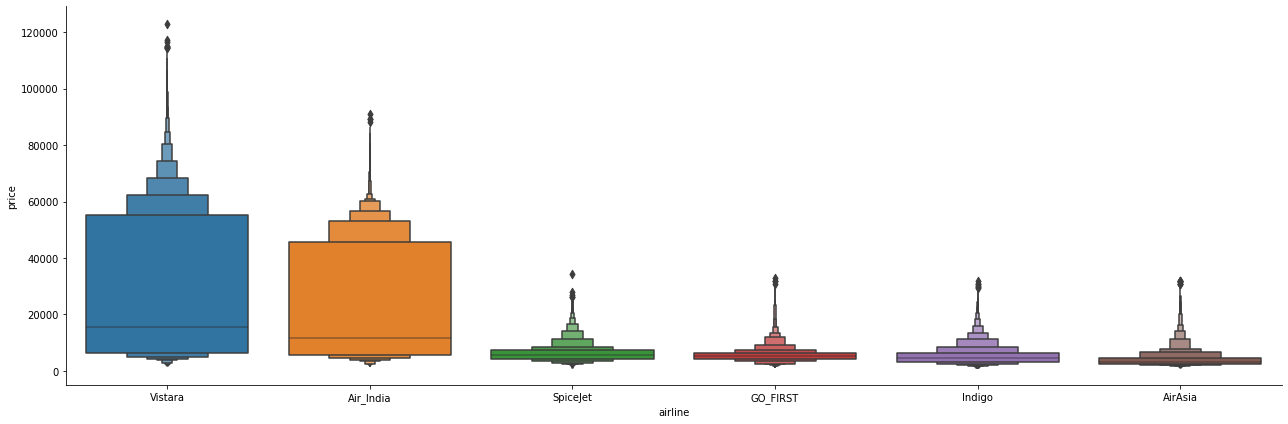

In [41]:
sns.catplot(y = "price", x = "airline", data = df3.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

- Giá vé của hãng Vistara là cao nhất, kế đến là Air India

---


- Các hãng còn lại có giá trị vé ở mức tương đương với nhau

*Nơi khởi hành, kết thúc vs Giá vé*

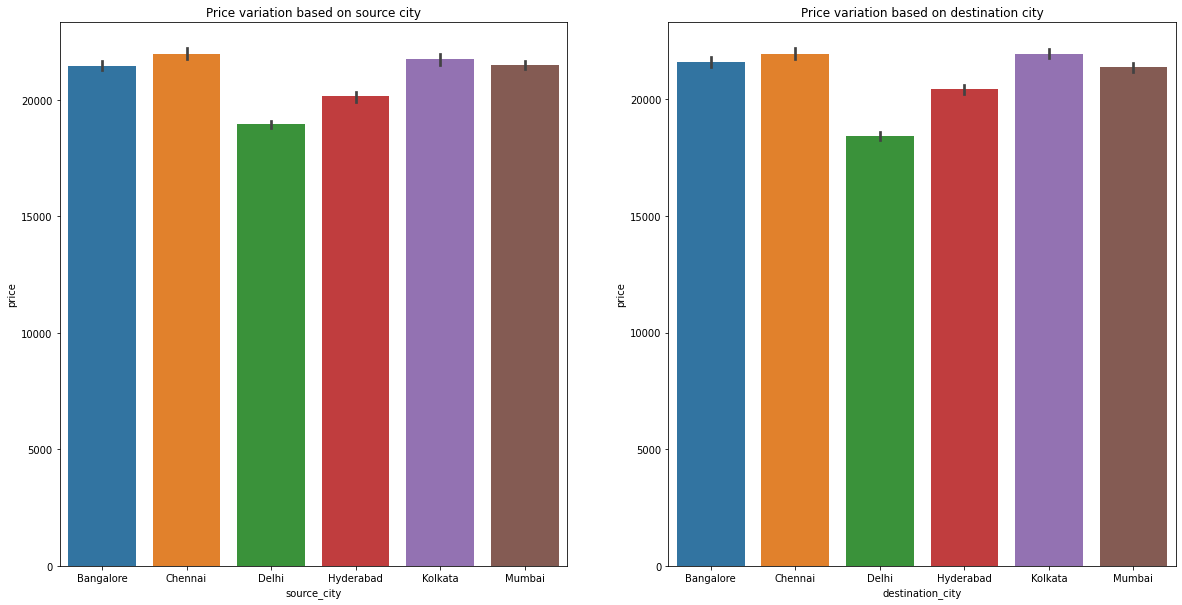

In [42]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='source_city', y='price', data=df3.sort_values('source_city', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on source city')

sns.barplot(x='destination_city', y='price', data=df3.sort_values('destination_city', axis=0), ax=axes[1])
axes[1].set(title='Price variation based on destination city');

:- Giá vé tại nơi khởi hành cao nhất là ở thành phố Chennai và thấp nhất là Delhi
- Giá vé tại nơi kết thúc cũng có giá trị tương đương


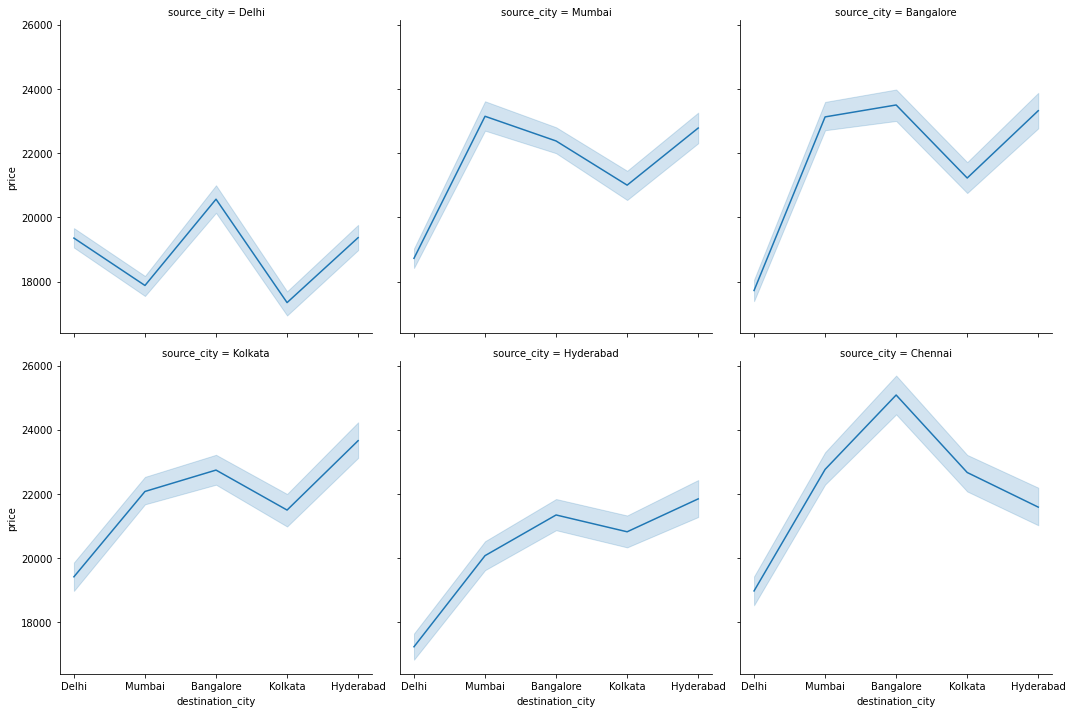

In [43]:
sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df3, col_wrap=3)

- Cùng một điểm đi và điểm đến khác nhau, hoặc ngược lại, giá vé sẽ khác nhau

*Chặng bay vs Giá vé*

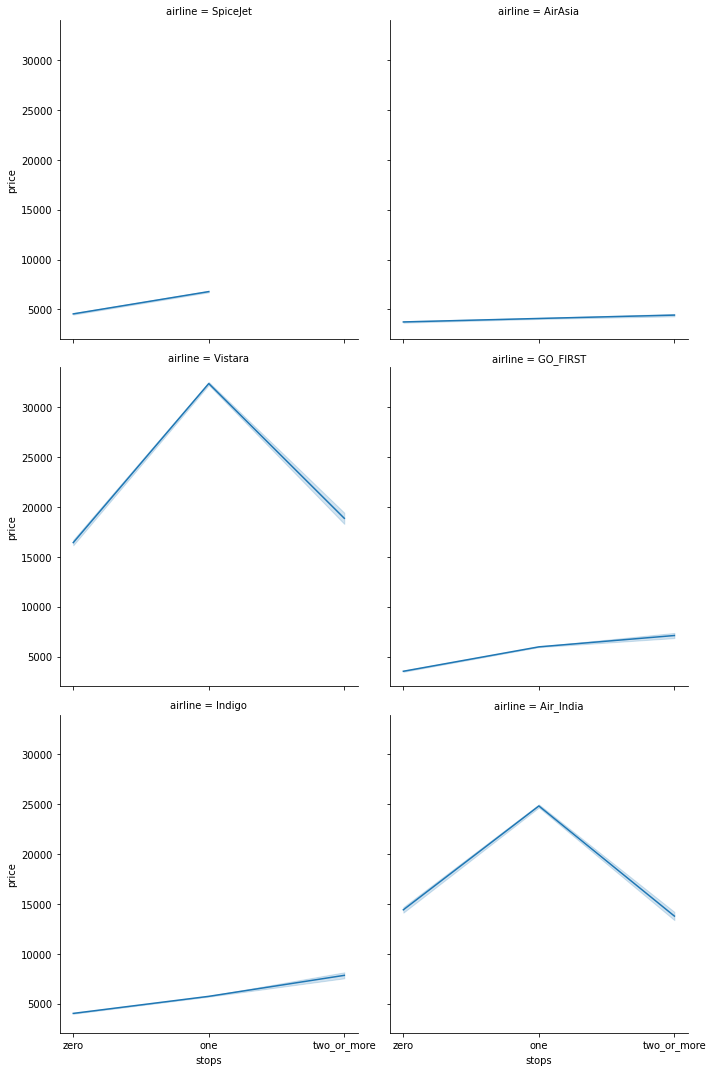

In [44]:
sns.relplot(col="airline", y="price", kind="line",x='stops', data=df3, col_wrap=2)

-    Biểu đồ giải thích một chút về lý do tại sao Vistara và Air India là những hãng hàng không đắt nhất, vì chúng ta có thể thấy điều kiện bay "one-stop" là giá cao nhất trong số những hãng hàng không khác.

*=> Điều kiện một điểm dừng là điều kiện phổ biến nhất theo đồ thị và giá cao nhất.*

Dịch vụ vs Giá vé

[Text(0.5, 1.0, 'Airways service count')]

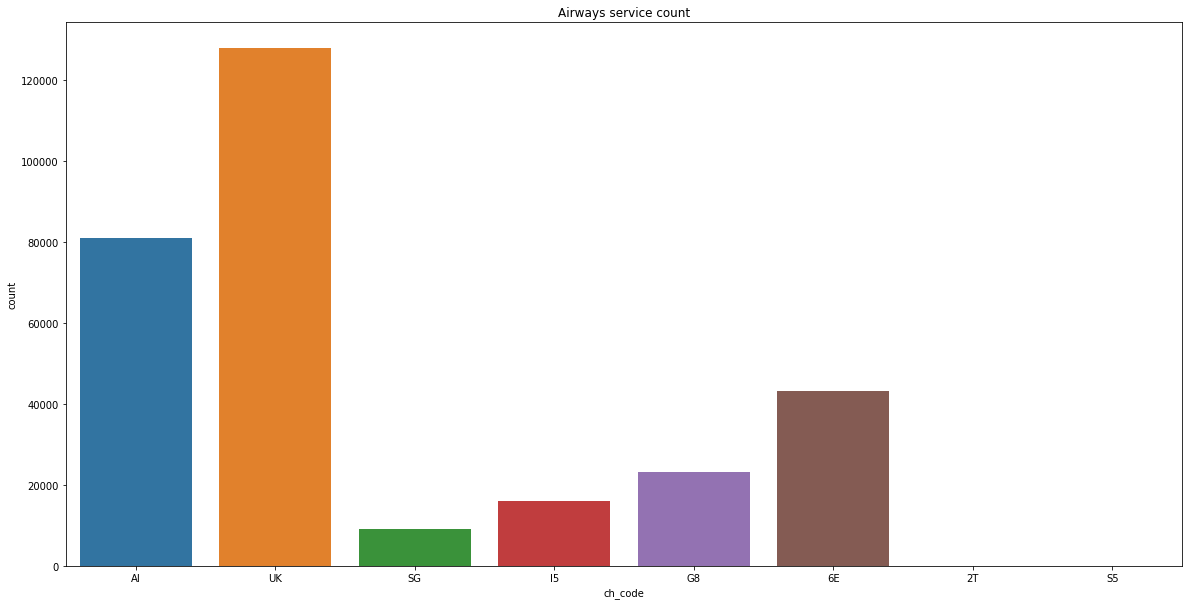

In [45]:
plt.figure(figsize=(20, 10))
sns.countplot(x='ch_code', data=new_df).set(title='Airways service count')

[Text(0.5, 1.0, 'Price variation based on airways service')]

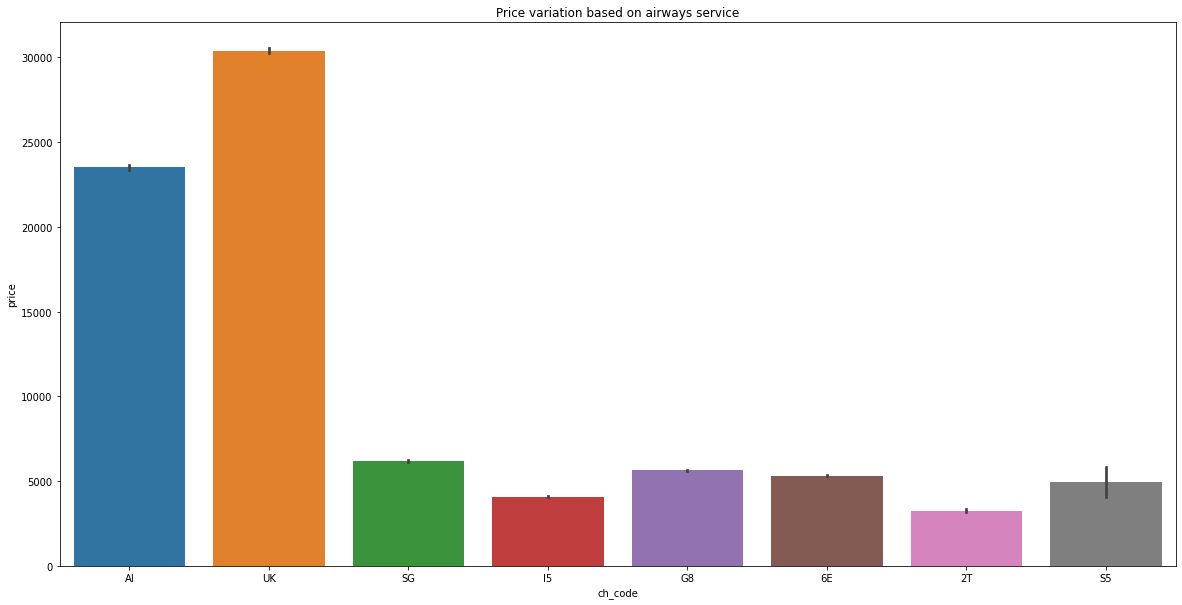

In [46]:
plt.figure(figsize=(20, 10))
sns.barplot(x='ch_code', y='price' ,data=new_df).set(title='Price variation based on airways service')

- Dựa trên hai biểu đồ trên, dịch vụ hàng không của UK là phổ biến nhất và giá vé mắc nhất

*Thời gian đặt vé vs Giá vé*

In [47]:
gby1 = df3.groupby(['source_city', 'destination_city', 'days_left'])['price'].mean()
gby1

source_city  destination_city  days_left
Bangalore    Chennai           1            22647.710526
                               2            32438.043956
                               3            30463.322917
                               4            25613.474227
                               5            24440.059322
                                                ...     
Mumbai       Kolkata           45           20009.839552
                               46           21356.389961
                               47           20899.023715
                               48           20550.008032
                               49           20710.546875
Name: price, Length: 1470, dtype: float64

In [48]:
gby1 = gby1.reset_index()
gby1.index.values

array([   0,    1,    2, ..., 1467, 1468, 1469])

In [49]:
gby1['combined_col'] = gby1['source_city'] + '_' + gby1['destination_city']

In [50]:
gby1.combined_col.nunique()

30

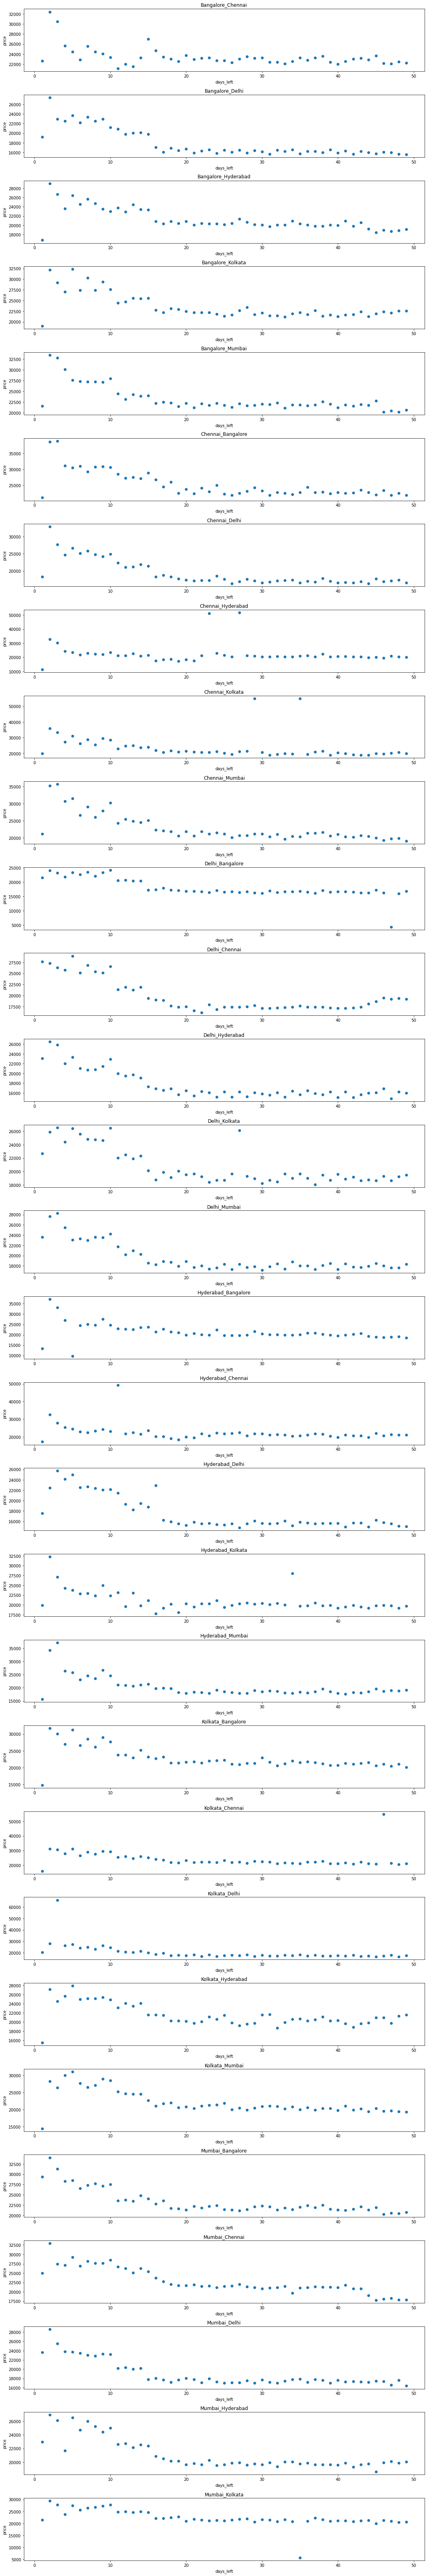

In [51]:
plt.figure(figsize=(15,90))
for indx, val in enumerate(gby1.combined_col.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = gby1.loc[gby1['combined_col'] == val]
    plt.scatter(temp_df['days_left'], temp_df['price'])
    plt.title(val)
    plt.xlabel('days_left')
    plt.ylabel('price')

plt.tight_layout()

- Mức giá thay đổi tùy thuộc vào ngày đặt vé, đặc biệt nếu đặt trước ngày bay một hoặc hai ngày thì giá sẽ càng cao. Cũng có một sự giảm giá một ngày trước khi khởi hành.

*Thời điểm trong ngày vs Giá vé*

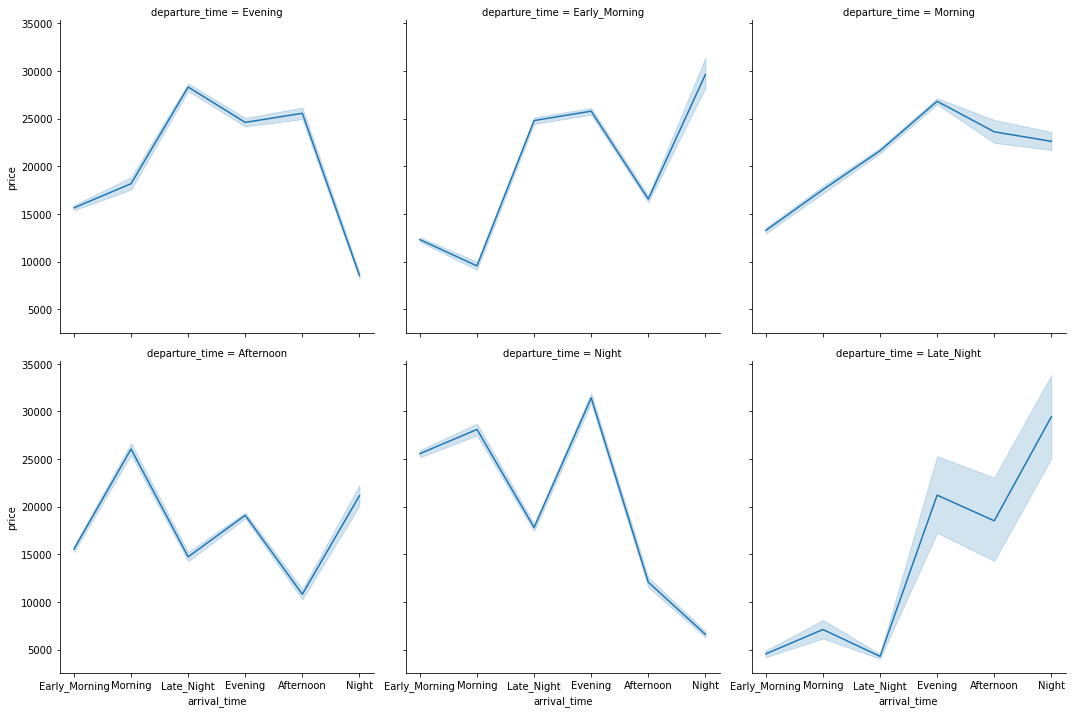

In [52]:
sns.relplot(col="departure_time", y="price", kind="line",x='arrival_time', data=df3, col_wrap=3)

- Giá thay đổi dựa trên thời gian khởi hành và thời gian đến,  ta có thể thấy nếu thời gian khởi hành là buổi tối và thời gian đến là ban đêm, thì giá vé sẽ rẻ hơn.

In [53]:
df3['price_per_minute'] = df3['price']/df3['duration']*60

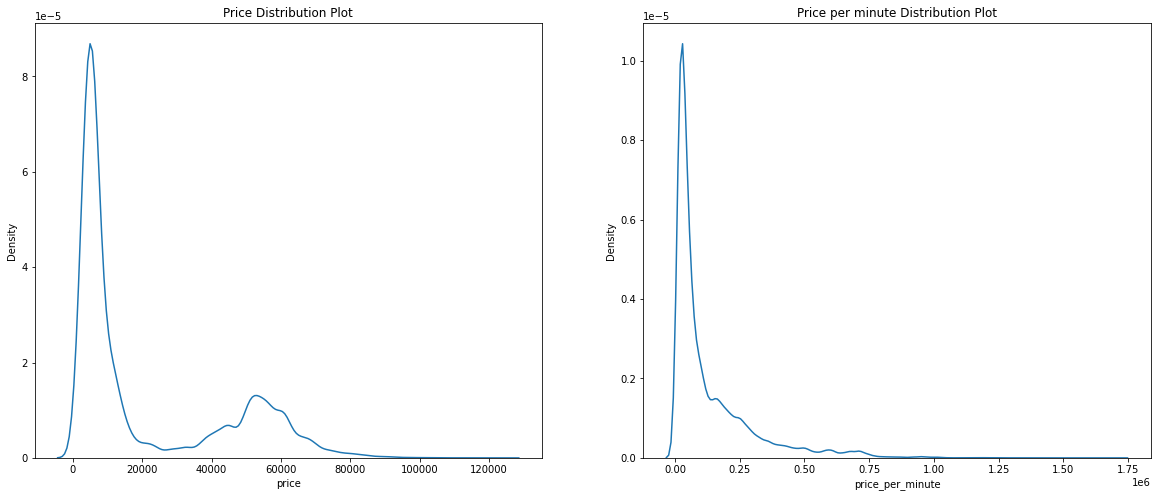

In [54]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.kdeplot(df3.price)

plt.subplot(1,2,2)
plt.title('Price per minute Distribution Plot')
sns.kdeplot(df3.price_per_minute)

plt.show()

## **XÂY DỰNG MÔ HÌNH**

In [55]:
df3.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'price_per_minute'],
      dtype='object')

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  price_per_minute  300153 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.5+ MB


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

In [58]:
airline = df3[["airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [59]:

source = df3[["source_city"]]

source = pd.get_dummies(source, drop_first= True)

source.head()

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [60]:
departure = df3[["departure_time"]]

departure = pd.get_dummies(departure, drop_first= True)

departure.head()

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [61]:
arrival = df3[["arrival_time"]]

arrival = pd.get_dummies(arrival, drop_first= True)

arrival.head()

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [62]:
destination = df3[["destination_city"]]

destination = pd.get_dummies(destination, drop_first= True)

destination.head()

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [63]:
df3.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)

In [64]:
df3.replace({"Economy": 0, "Business": 1}, inplace = True)

In [65]:
df4 = pd.concat([df3, airline, source, departure, arrival, destination], axis = 1)

In [66]:
df4.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,...,0,0,0,0,1,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,...,0,0,0,1,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,...,1,0,0,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,...,0,0,0,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,...,0,0,0,1,0,0,0,0,0,1


In [67]:
df4.drop(["airline", "flight", 'source_city', "departure_time", 'arrival_time', 'destination_city', 'price_per_minute'], axis = 1, inplace = True)

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
num_vars = ['duration', 'days_left']
df4[num_vars] = scaler.fit_transform(df4[num_vars])



In [69]:
df4.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [70]:
X = df4.drop(['price'], axis=1)
y = df4['price']

In [71]:
X

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0.027347,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0.030612,0.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0.027347,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.028980,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.030612,0.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,0.188776,1.0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
300149,1,1,0.195714,1.0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300150,1,1,0.265306,1.0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300151,1,1,0.187143,1.0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [72]:
df4.describe()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,0.311464,0.232470,0.520932,20889.660523,0.269503,0.077204,0.143660,0.030021,0.425979,...,0.051364,0.260944,0.046646,0.209010,0.304971,0.134491,0.191103,0.142347,0.165029,0.196890
std,0.398106,0.463093,0.146775,0.282521,22697.767366,0.443702,0.266915,0.350745,0.170646,0.494491,...,0.220739,0.439150,0.210880,0.406602,0.460396,0.341180,0.393170,0.349407,0.371207,0.397649
min,0.000000,0.000000,0.000000,0.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.122449,0.291667,4783.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.212653,0.520833,7425.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.313061,0.770833,42521.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


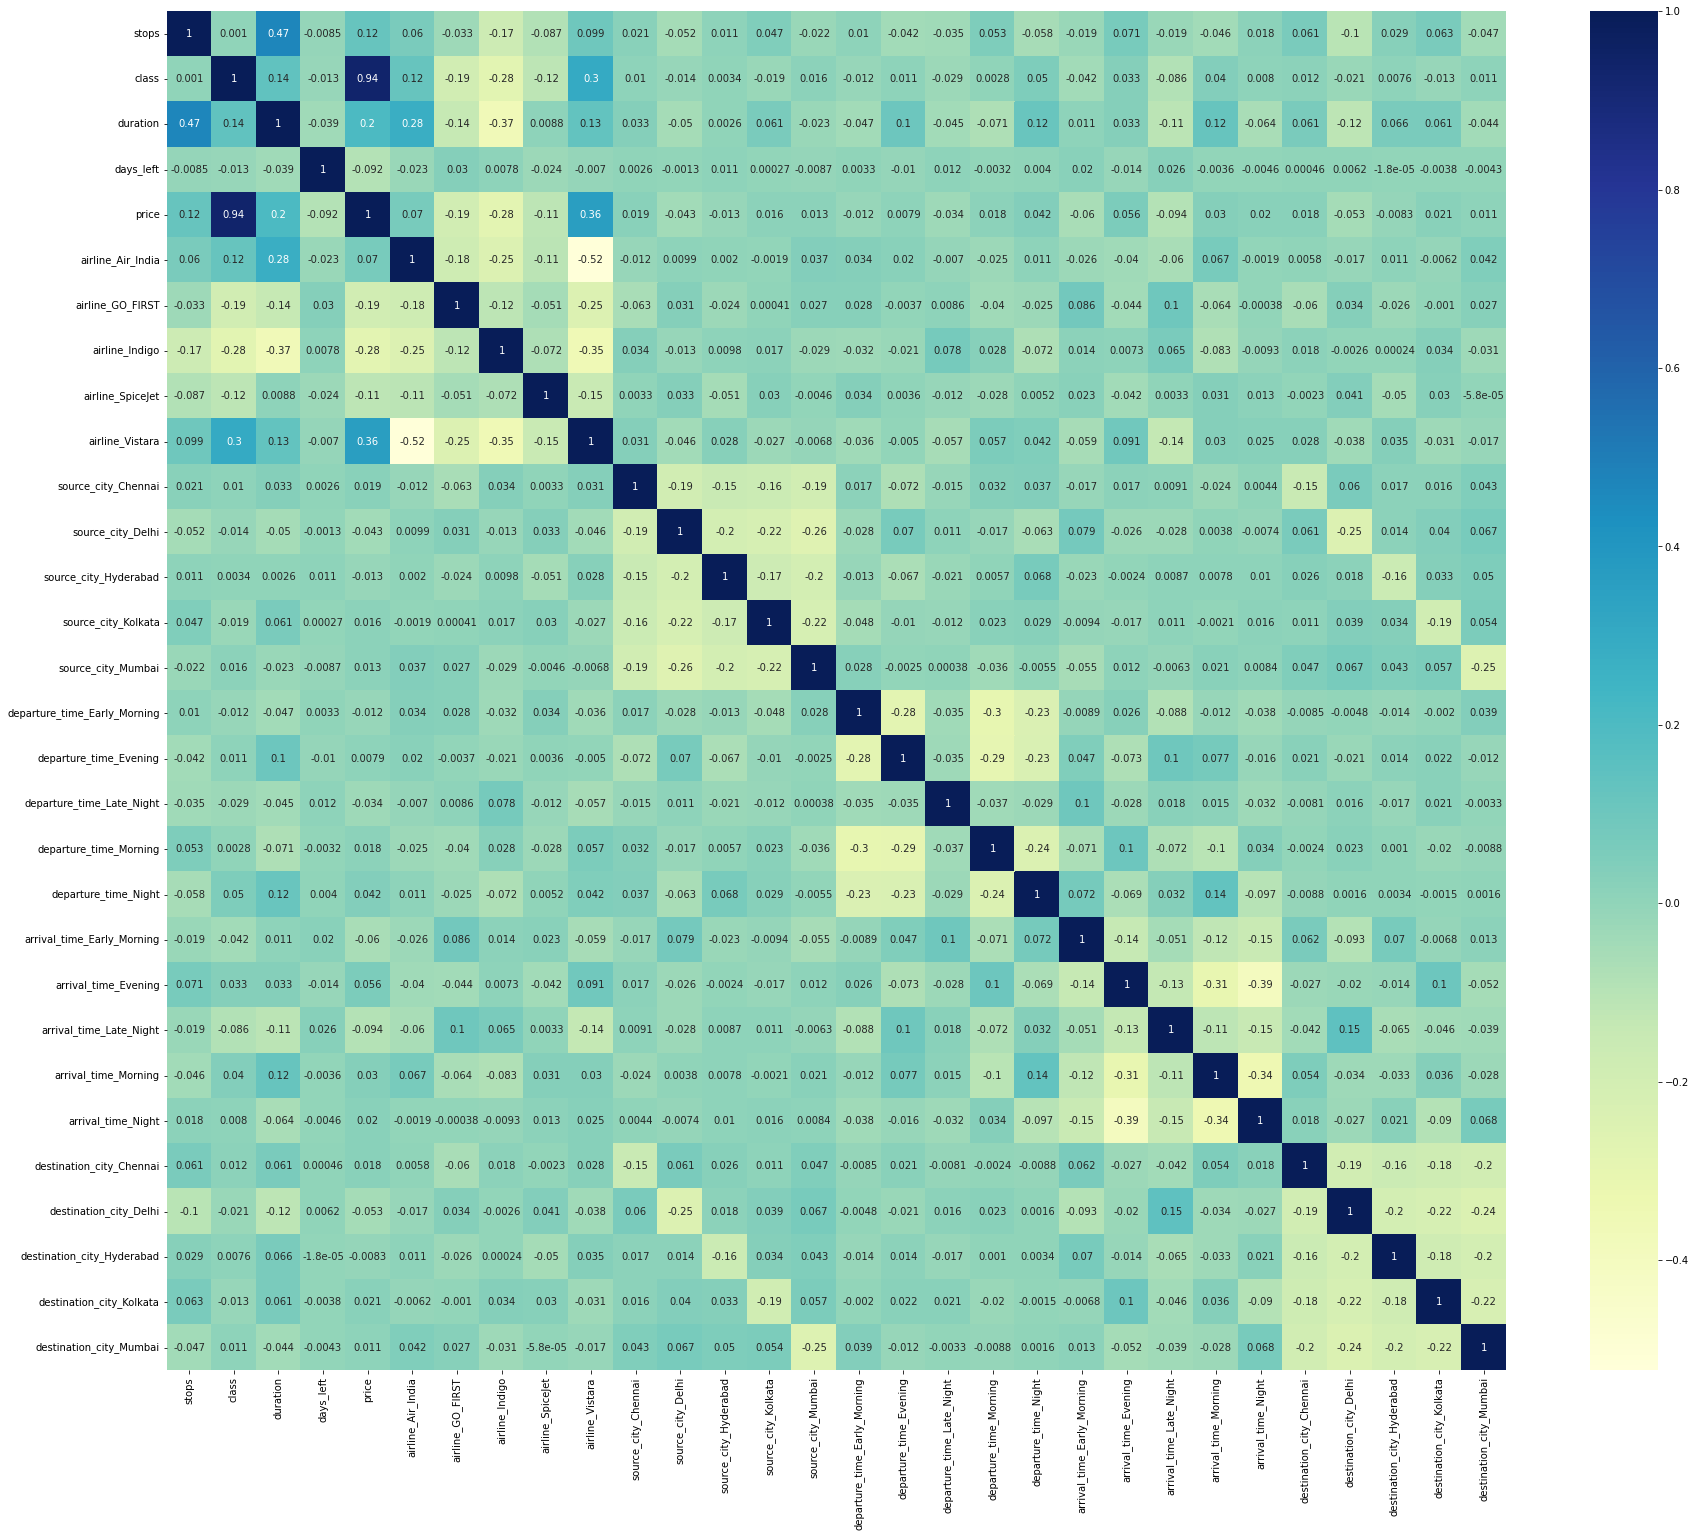

In [73]:
plt.figure(figsize = (30, 25))
sns.heatmap(df4.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [75]:
print(selection.feature_importances_)

[2.98988894e-02 8.80371109e-01 2.66925813e-02 1.87719870e-02
 6.16552023e-03 1.82385565e-04 1.60214518e-04 1.37473120e-04
 4.80111544e-03 1.03293974e-03 4.32786305e-03 1.48200740e-03
 2.04309592e-03 2.36700384e-03 1.08221868e-03 1.47426706e-03
 5.31512180e-05 1.36654267e-03 9.97934496e-04 9.50094703e-04
 1.50679347e-03 2.17830242e-04 1.06347678e-03 1.74997796e-03
 1.05001410e-03 4.07393250e-03 1.94005742e-03 1.91962260e-03
 2.11990078e-03]


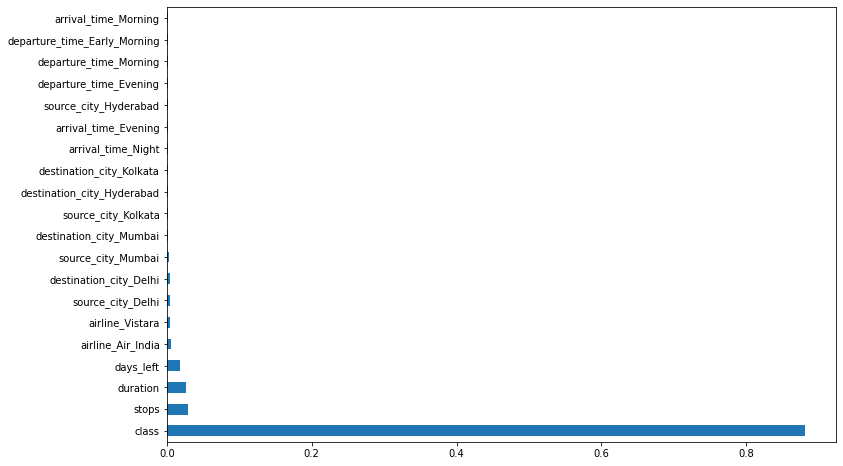

In [76]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [89]:
X = df4[['class', 'stops', 'duration', 'days_left']]
y = df4['price']

In [90]:
cat_columns = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
num_columns = ['duration','days_left']

In [91]:
encoder = OrdinalEncoder().fit_transform(df3[cat_columns])
encoder = pd.DataFrame(encoder,columns = cat_columns)

In [92]:
print(encoder)

        airline  source_city  departure_time  stops  arrival_time  \
0           4.0          2.0             2.0    0.0           5.0   
1           4.0          2.0             1.0    0.0           4.0   
2           0.0          2.0             1.0    0.0           1.0   
3           5.0          2.0             4.0    0.0           0.0   
4           5.0          2.0             4.0    0.0           4.0   
...         ...          ...             ...    ...           ...   
300148      5.0          1.0             4.0    1.0           2.0   
300149      5.0          1.0             0.0    1.0           5.0   
300150      5.0          1.0             1.0    1.0           5.0   
300151      5.0          1.0             1.0    1.0           2.0   
300152      5.0          1.0             4.0    1.0           2.0   

        destination_city  class  
0                    5.0    0.0  
1                    5.0    0.0  
2                    5.0    0.0  
3                    5.0    0.0  
4

In [93]:
X = pd.concat([encoder,df3[num_columns]],axis=1)
y = df3['price']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

,,,,,,,,,,,,,,,,,,,,,,

Linear Re Model

In [95]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)


[ 4019.12492126 52966.47929841  7279.35455888 ...  4966.12328947
 -1380.93315284 58370.48712141]


In [97]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9062722423932456
Mean Squared Error:  48314997.58764198
Mean Absolute Error 4527.1549602515015
Root Mean Squared Error: 6950.899048874324


Random Forest Re

In [98]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(y_pred)

[ 6342.93 69846.36  6195.   ...  6589.61  3762.9  71053.96]


In [99]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9850444253725149
Mean Squared Error:  7709333.6115049515
Mean Absolute Error 1087.2709639228844
Root Mean Squared Error: 2776.568675812819


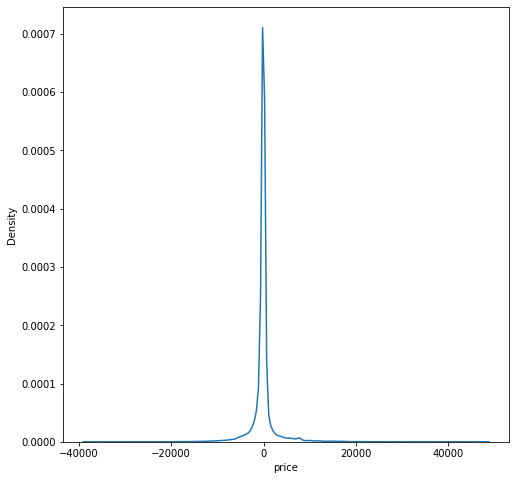

In [100]:
plt.figure(figsize = (8,8))
sns.kdeplot(y_test-y_pred)
plt.show()

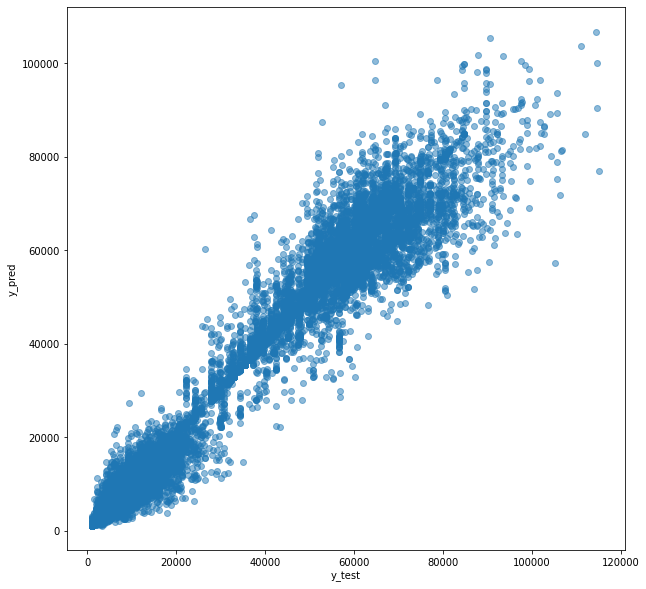

In [101]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()